In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import pandas as pd

In [2]:
def crypto(x):
    start = dt.datetime(2008,1,1)
    end = dt.datetime.now()

    x = web.DataReader(str(x)+'-USD', 'yahoo', start, end)
    return x

In [3]:
df = crypto('BTC')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-28,37952.878906,36211.109375,37128.445312,37784.332031,2.223883e+10,37784.332031
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,1.719418e+10,38138.179688
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,1.464355e+10,37917.601562
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,2.073473e+10,38483.125000
2022-02-02,38828.359375,38449.855469,38758.101562,38457.500000,2.039769e+10,38457.500000


In [4]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [5]:
df.index = pd.to_datetime(df.index, format ='%Y-%m-%d')

In [6]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-28,37952.878906,36211.109375,37128.445312,37784.332031,2.223883e+10,37784.332031
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,1.719418e+10,38138.179688
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,1.464355e+10,37917.601562
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,2.073473e+10,38483.125000
2022-02-02,38828.359375,38449.855469,38758.101562,38457.500000,2.039769e+10,38457.500000


# Criando campos de MA5d e MA21d

In [7]:
df['ma5d'] = df['Close'].rolling(5).mean()
df['ma21d'] = df['Close'].rolling(21).mean()
#df['ma200d'] = df['Close'].rolling(200).mean()

In [8]:
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close,ma5d,ma21d
Date,,,,,,,,
2022-01-26,38825.410156,36374.906250,36950.515625,36852.121094,3.132460e+10,36852.121094,36353.501563,40672.804501
2022-01-27,37148.324219,35629.281250,36841.878906,37138.234375,2.504143e+10,37138.234375,36775.098437,40386.009487
2022-01-28,37952.878906,36211.109375,37128.445312,37784.332031,2.223883e+10,37784.332031,37076.603906,40206.315662
2022-01-29,38576.261719,37406.472656,37780.714844,38138.179688,1.719418e+10,38138.179688,37373.374219,40035.088914
2022-01-30,38266.339844,37437.710938,38151.917969,37917.601562,1.464355e+10,37917.601562,37566.093750,39844.898438
2022-01-31,38647.261719,36733.574219,37920.281250,38483.125000,2.073473e+10,38483.125000,37892.294531,39685.939546
2022-02-02,38828.359375,38449.855469,38758.101562,38457.500000,2.039769e+10,38457.500000,38156.147656,39482.208333


In [9]:
df['Close'] = df['Close'].shift(-1)

df

,High,Low,Open,Close,Volume,Adj Close,ma5d,ma21d
Date,,,,,,,,
2014-09-17,468.174011,452.421997,465.864014,424.440002,2.105680e+07,457.334015,NaN,NaN
2014-09-18,456.859985,413.104004,456.859985,394.795990,3.448320e+07,424.440002,NaN,NaN
2014-09-19,427.834991,384.532013,424.102997,408.903992,3.791970e+07,394.795990,NaN,NaN
2014-09-20,423.295990,389.882996,394.673004,398.821014,3.686360e+07,408.903992,NaN,NaN
2014-09-21,412.425995,393.181000,408.084991,402.152008,2.658010e+07,398.821014,416.859003,NaN
...,...,...,...,...,...,...,...,...
2022-01-28,37952.878906,36211.109375,37128.445312,38138.179688,2.223883e+10,37784.332031,37076.603906,40206.315662
2022-01-29,38576.261719,37406.472656,37780.714844,37917.601562,1.719418e+10,38138.179688,37373.374219,40035.088914
2022-01-30,38266.339844,37437.710938,38151.917969,38483.125000,1.464355e+10,37917.601562,37566.093750,39844.898438


In [10]:
df.dropna(inplace=True)

df

,High,Low,Open,Close,Volume,Adj Close,ma5d,ma21d
Date,,,,,,,,
2014-10-07,339.247009,320.481995,330.584015,352.940002,4.919990e+07,336.187012,335.030804,387.352142
2014-10-08,354.364014,327.187988,336.115997,365.026001,5.473630e+07,352.940002,333.716406,382.380999
2014-10-09,382.726013,347.687012,352.747986,361.562012,8.364110e+07,365.026001,340.948407,379.551761
2014-10-10,375.066986,352.963013,364.687012,362.299011,4.366570e+07,361.562012,349.158807,377.969190
2014-10-11,367.191010,355.950989,361.362000,378.549011,1.334520e+07,362.299011,355.602808,375.749906
...,...,...,...,...,...,...,...,...
2022-01-27,37148.324219,35629.281250,36841.878906,37784.332031,2.504143e+10,37138.234375,36775.098437,40386.009487
2022-01-28,37952.878906,36211.109375,37128.445312,38138.179688,2.223883e+10,37784.332031,37076.603906,40206.315662
2022-01-29,38576.261719,37406.472656,37780.714844,37917.601562,1.719418e+10,38138.179688,37373.374219,40035.088914


# Verificando Quantidade de Linhas

In [11]:
line_count = len(df)
#print(line_count)
line_count_training = round(line_count *0.7)
line_count_test = round(line_count*0.2) + line_count_training

line_count_validator = line_count_test

info = (
    f"linhas treino= 0:{line_count_training}"
    f" linhas teste= {line_count_training}:{line_count_test-1}"
    f" linhas validação= {line_count_test-1}:{line_count}"
)

print(info)
print(line_count)
print(line_count_test)
print(line_count_training)
print(line_count_validator)

linhas treino= 0:1872 linhas teste= 1872:2406 linhas validação= 2406:2674
2674
2407
1872
2407


# Colocando o Indice(ano-mes-dia) como Coluna de dia

In [12]:
#df['Day'] = df.index
df = df.reset_index()

In [13]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,ma5d,ma21d
2669,2022-01-27,37148.324219,35629.281250,36841.878906,37784.332031,2.504143e+10,37138.234375,36775.098437,40386.009487
2670,2022-01-28,37952.878906,36211.109375,37128.445312,38138.179688,2.223883e+10,37784.332031,37076.603906,40206.315662
2671,2022-01-29,38576.261719,37406.472656,37780.714844,37917.601562,1.719418e+10,38138.179688,37373.374219,40035.088914
2672,2022-01-30,38266.339844,37437.710938,38151.917969,38483.125000,1.464355e+10,37917.601562,37566.093750,39844.898438
2673,2022-01-31,38647.261719,36733.574219,37920.281250,38457.500000,2.073473e+10,38483.125000,37892.294531,39685.939546


In [14]:
features = df.drop(['Date', 'Close'], 1)
labels = df['Close']

C:\Users\Hayek\AppData\Local\Temp\ipykernel_20708\196778337.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop(['Date', 'Close'], 1)


In [15]:
features_list = ['Open', 'Volume', 'ma5d', 'ma21d']#'Adj Close', 

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print('Melhores features: ')
print(k_best_features_final)


Melhores features: 
{'Volume': 6953.496999191339, 'ma5d': 5940.248371162556, 'ma21d': 4481.862421142788}


In [16]:
features = df.drop(['Date', 'High', 'Low', 'Open', 'Close', 'Adj Close', ], 1) #'Adj Close', adicionado

C:\Users\Hayek\AppData\Local\Temp\ipykernel_20708\2919272141.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = df.drop(['Date', 'High', 'Low', 'Open', 'Close', 'Adj Close', ], 1) #'Adj Close', adicionado


In [17]:
volume = 20166322176
adj_close = 38742.082031
ma5d = 38213.064063
ma21d = 39495.759859
date_today = '2022-02-01'
teste_valores = {'Volume': volume,  'ma5d': ma5d, 'ma21d': ma21d} #'Adj Close': adj_close,
#features = features.append(teste_valores, ignore_index = True)
features

C:\Users\Hayek\AppData\Local\Temp\ipykernel_20708\224096385.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(teste_valores, ignore_index = True)


,Volume,ma5d,ma21d
0,4.919990e+07,335.030804,387.352142
1,5.473630e+07,333.716406,382.380999
2,8.364110e+07,340.948407,379.551761
3,4.366570e+07,349.158807,377.969190
4,1.334520e+07,355.602808,375.749906
...,...,...,...
2670,2.223883e+10,37076.603906,40206.315662
2671,1.719418e+10,37373.374219,40035.088914
2672,1.464355e+10,37566.093750,39844.898438
2673,2.073473e+10,37892.294531,39685.939546


In [18]:
scaler = MinMaxScaler().fit(features)
features_scale = (scaler.transform(features))

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (2675, 3)
[[1.23333371e-04 2.04347148e-03 2.55462714e-03]
 [1.39108297e-04 2.02341254e-03 2.47545611e-03]
 [2.21467076e-04 2.13377956e-03 2.43039732e-03]
 ...
 [4.17071727e-02 5.70223916e-01 6.30960277e-01]
 [5.90628453e-02 5.75202041e-01 6.28428679e-01]
 [5.74432732e-02 5.80097281e-01 6.25399854e-01]]


In [19]:
X_train = features_scale[:line_count_training]
X_test = features_scale[line_count_training:line_count_test]

y_train = labels[:line_count_training]
y_test = labels[line_count_training:line_count_test]

print(len(X_train), len(y_train))

print( len(X_test), len(y_test))

1872 1872
535 535


In [20]:
#df = df.append({'Volume': volume, 'Adj Close': adj_close, 'ma5d': ma5d, 'ma21d': ma21d, 'Date': date_today}, ignore_index = True)
df

,Date,High,Low,Open,Close,Volume,Adj Close,ma5d,ma21d
0,2014-10-07,339.247009,320.481995,330.584015,352.940002,4.919990e+07,336.187012,335.030804,387.352142
1,2014-10-08,354.364014,327.187988,336.115997,365.026001,5.473630e+07,352.940002,333.716406,382.380999
2,2014-10-09,382.726013,347.687012,352.747986,361.562012,8.364110e+07,365.026001,340.948407,379.551761
3,2014-10-10,375.066986,352.963013,364.687012,362.299011,4.366570e+07,361.562012,349.158807,377.969190
4,2014-10-11,367.191010,355.950989,361.362000,378.549011,1.334520e+07,362.299011,355.602808,375.749906
...,...,...,...,...,...,...,...,...,...
2669,2022-01-27,37148.324219,35629.281250,36841.878906,37784.332031,2.504143e+10,37138.234375,36775.098437,40386.009487
2670,2022-01-28,37952.878906,36211.109375,37128.445312,38138.179688,2.223883e+10,37784.332031,37076.603906,40206.315662
2671,2022-01-29,38576.261719,37406.472656,37780.714844,37917.601562,1.719418e+10,38138.179688,37373.374219,40035.088914
2672,2022-01-30,38266.339844,37437.710938,38151.917969,38483.125000,1.464355e+10,37917.601562,37566.093750,39844.898438


In [21]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [22]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
cd = r2_score(y_test, pred)

f'Coeficiente de determinação: {cd*100:.2f}'

'Coeficiente de determinação: 99.16'

In [23]:
#rn = MLPRegressor(max_iter=2000)
#
#rn.fit(X_train, y_train)
#pred = rn.predict(X_test)
#
#cd = rn.score(X_test, y_test)
#f'Coeficiente de determinação: {cd*100:.2f}'

In [24]:
##REDE NEURAL COM AJUSTE DE HYPER PARAMETERS
#
#rn = MLPRegressor()
#parameter_space = {
#    'hidden_layer_sizes': [(i,) for i in list(range(1,21))],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam', 'lbfgs'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant', 'adaptive'],
#    }
#
#search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)
#
#search.fit(X_train, y_train)
#clf = search.best_estimator_
#pred = search.predict(X_test)
#
#cd = search.score(X_test, y_test)
#
#f'Coeficiente de determinação: {cd*100:.2f}'

In [25]:
previsao = features_scale[line_count_training:line_count_test] #[line_count_test:]

date_full = df['Date']
date = date_full[line_count_training:line_count_test]

res_full = df['Close']
res = res_full[line_count_training:line_count_test]

pred = lr.predict(previsao)

df_final = pd.DataFrame({'date':date, 'real':res, 'previsao':pred})
df_final['real'] = df_final['real'].shift(+1)

df_final.set_index('date', inplace=True)

print(df_final)

                    real      previsao
date                                  
2019-11-22           NaN   7852.141954
2019-11-23   7397.796875   7596.895403
2019-11-24   7047.916992   7390.437427
2019-11-25   7146.133789   7261.292883
2019-11-26   7218.371094   7081.665871
...                  ...           ...
2021-05-05  57424.007812  56250.863393
2021-05-06  56396.515625  55976.594489
2021-05-07  57356.402344  56171.432031
2021-05-08  58803.777344  56541.210365
2021-05-09  58232.316406  57655.407996

[535 rows x 2 columns]


In [30]:
previsao2 = features_scale[line_count_test:line_count] #[line_count_test:]line_count_test: line_count_training:line_count_test

date_full2 = df['Date']
date2 = date_full2[line_count_test:line_count]

res_full2 = df['Close']
res2 = res_full2[line_count_test:line_count]

pred2 = lr.predict(previsao2)

df_2 = pd.DataFrame({'date':date2, 'real':res2, 'previsao':pred2})
df_2['real'] = df_final['real'].shift(+1)

df_2.set_index('date', inplace=True)

print(df_final)

                    real      previsao
date                                  
2019-11-22           NaN   7852.141954
2019-11-23   7397.796875   7596.895403
2019-11-24   7047.916992   7390.437427
2019-11-25   7146.133789   7261.292883
2019-11-26   7218.371094   7081.665871
...                  ...           ...
2021-05-05  57424.007812  56250.863393
2021-05-06  56396.515625  55976.594489
2021-05-07  57356.402344  56171.432031
2021-05-08  58803.777344  56541.210365
2021-05-09  58232.316406  57655.407996

[535 rows x 2 columns]


In [33]:
valor_novo = teste_valores

In [34]:
previsao=scaler.transform(valor_novo)

pred = lr.predict(previsao)

pred

TypeError: float() argument must be a string or a number, not 'dict'

In [ ]:
df_final.to_excel("output.xlsx")

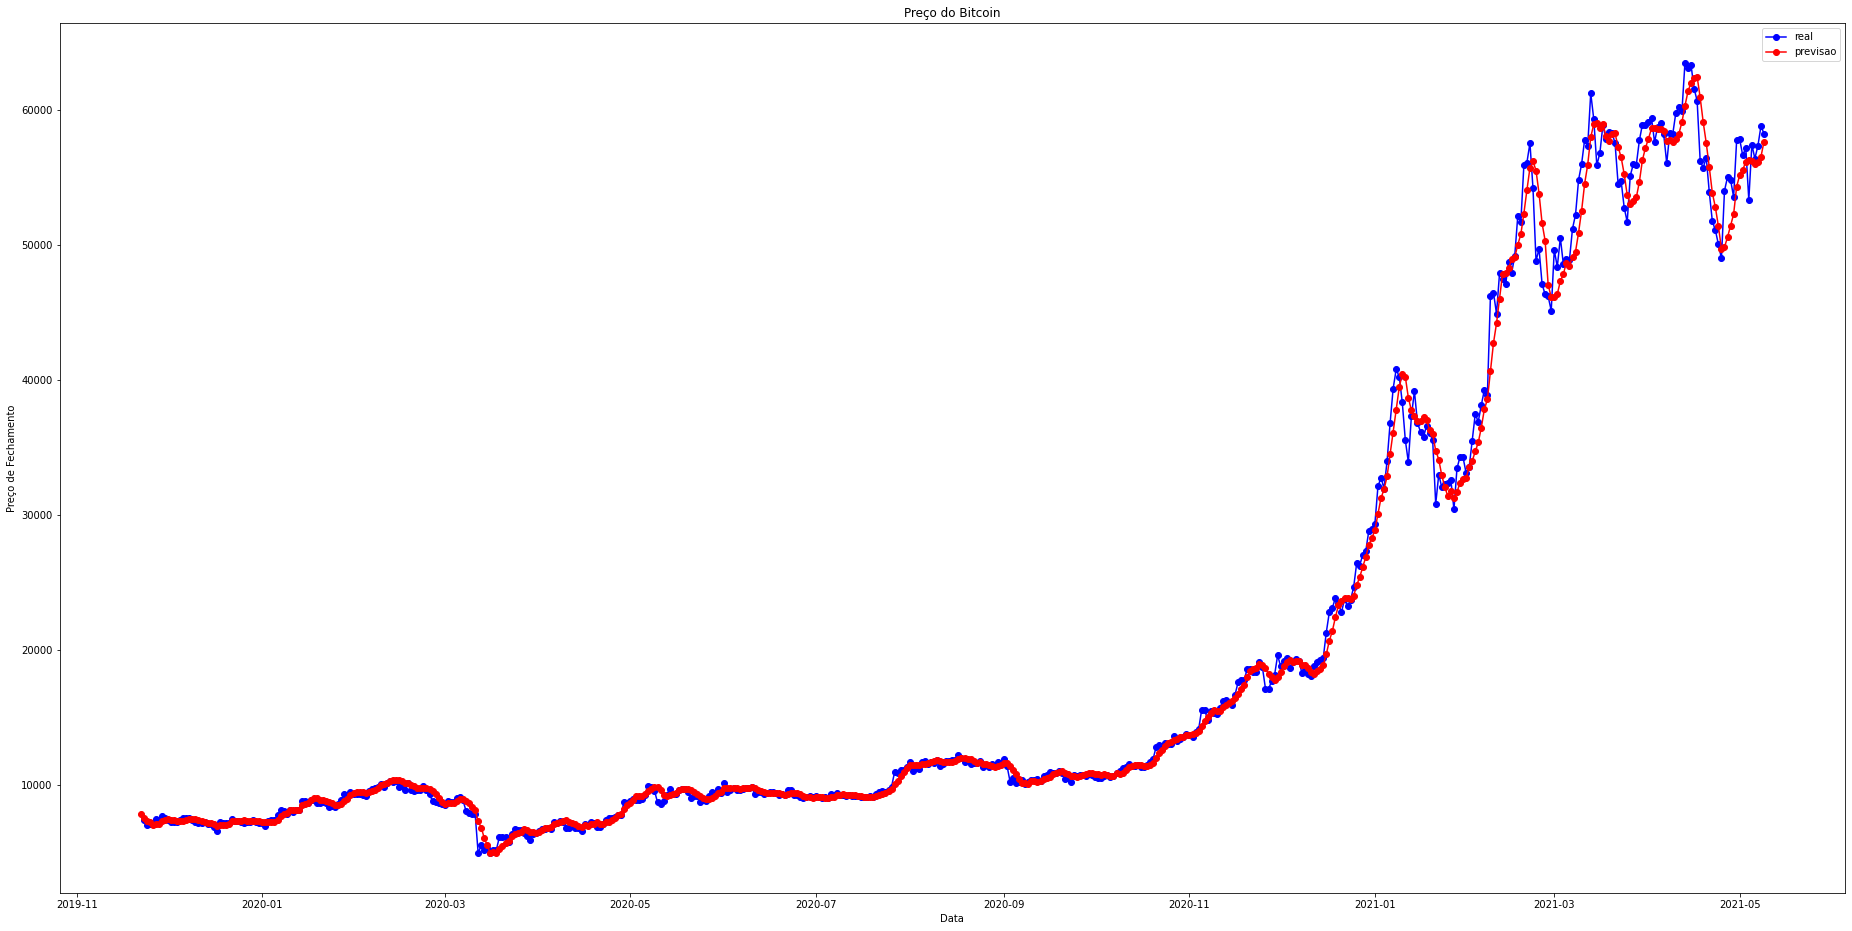

In [ ]:
plt.figure(figsize = (32, 16))
plt.title('Preço do Bitcoin')
plt.plot(df_final['real'], label = 'real', color='blue', marker = 'o')
plt.plot(df_final['previsao'], label = 'previsao', color='red', marker = 'o')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
leg = plt.legend()